# 머신러닝 종합실습: 데이터 전처리부터 분류까지

## 📋 목차
1. **이상치 탐지 및 처리** - 박스플롯과 IQR 방법
2. **Iris 데이터셋** - 기본적인 분류 작업
3. **펭귄 데이터셋** - 결측치 처리와 라벨 인코딩
4. **다이아몬드 데이터셋** - 복잡한 범주형 데이터 처리
5. **종합 결과 비교** - 성능 분석 및 인사이트

## 🎯 학습 목표
- 다양한 데이터 전처리 기법 습득
- 결측치와 이상치 처리 방법 이해
- 범주형 데이터의 라벨 인코딩 기법
- 로지스틱 회귀를 통한 분류 성능 비교


In [27]:
# 필요한 라이브러리 임포트
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("✅ 라이브러리 임포트 완료!")
print("📊 사용 가능한 라이브러리: pandas, numpy, matplotlib, sklearn")


✅ 라이브러리 임포트 완료!
📊 사용 가능한 라이브러리: pandas, numpy, matplotlib, sklearn


## 1. 이상치 탐지 및 처리 📈

### 🔍 이상치란?
- **정의**: 통계적으로 특이한 값들
- **예시**: 직원 평균 연봉에 포함된 임원 연봉
- **영향**: 모델 성능 저하 가능성
- **처리 방법**: 제거, 대체, 변환

### 📊 IQR 방법
- **하한**: Q1 - 1.5 × IQR
- **상한**: Q3 + 1.5 × IQR
- **IQR**: Q3 - Q1 (Interquartile Range)


=== 이상치 탐지 및 처리 실습 ===
원본 데이터: [1, 2, nan, 4, 5, 6, nan, 8, 9, 10]
결측치 대체 후: [  1.   2. 100.   4.   5.   6. 100.   8.   9.  10.]

📊 통계 정보:
Q1 (25%): 4.25
Q3 (75%): 9.75
IQR: 5.50
하한 경계: -4.00
상한 경계: 18.00
탐지된 이상치: [100. 100.]


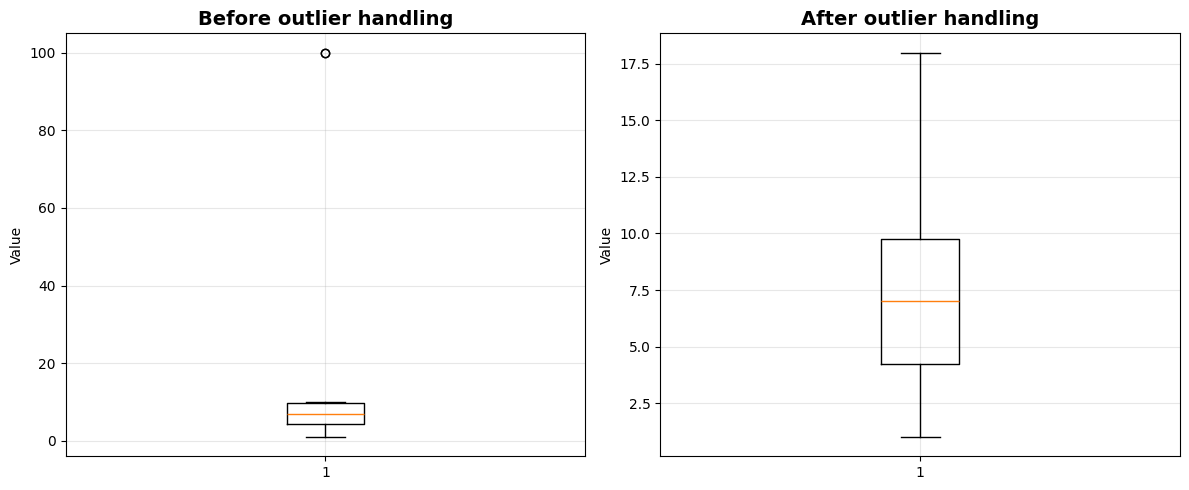


📈 처리 결과:
처리 전 - 평균: 24.50, 표준편차: 39.90
처리 후 - 평균: 8.10, 표준편차: 5.95
✅ 이상치 처리로 데이터가 안정화되었습니다!


In [29]:
# 이상치 탐지 및 처리 실습
print("=== 이상치 탐지 및 처리 실습 ===")

# 이상치가 포함된 샘플 데이터 생성
data_with_outliers = [1, 2, np.nan, 4, 5, 6, np.nan, 8, 9, 10]
a = pd.Series(data_with_outliers)
print(f"원본 데이터: {data_with_outliers}")

# 결측치를 100으로 대체 (의도적으로 이상치 생성)
a[a.isna()] = 100
print(f"결측치 대체 후: {a.values}")

# 이상치 탐지 함수 정의
def detect_outliers_iqr(data):
    """IQR 방법을 사용한 이상치 범위 계산"""
    q1, q3 = np.percentile(data, [25, 75])  
    iqr = q3 - q1 
    lower_bound = q1 - iqr * 1.5
    upper_bound = q3 + iqr * 1.5
    return lower_bound, upper_bound, q1, q3, iqr

# 이상치 범위 계산
lower, upper, q1, q3, iqr = detect_outliers_iqr(a)
print(f"\n📊 통계 정보:")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"하한 경계: {lower:.2f}")
print(f"상한 경계: {upper:.2f}")

# 이상치 탐지
outliers = a[(a < lower) | (a > upper)]
print(f"탐지된 이상치: {outliers.values}")

# 박스플롯으로 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 처리 전 박스플롯
ax1.boxplot(a, vert=True)
ax1.set_title('Before outlier handling', fontsize=14, fontweight='bold')
ax1.set_ylabel('Value')
ax1.grid(True, alpha=0.3)

# 이상치 처리 (경계값으로 대체)
a_processed = a.copy()
a_processed[a_processed < lower] = lower
a_processed[a_processed > upper] = upper

# 처리 후 박스플롯
ax2.boxplot(a_processed, vert=True)
ax2.set_title('After outlier handling', fontsize=14, fontweight='bold')
ax2.set_ylabel('Value')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 처리 결과:")
print(f"처리 전 - 평균: {a.mean():.2f}, 표준편차: {a.std():.2f}")
print(f"처리 후 - 평균: {a_processed.mean():.2f}, 표준편차: {a_processed.std():.2f}")
print(f"✅ 이상치 처리로 데이터가 안정화되었습니다!")


## 2. Iris 데이터셋 분석 🌸

### 📊 데이터셋 특징
- **목적**: 붓꽃 품종 분류 (setosa, versicolor, virginica)
- **특성**: 꽃받침과 꽃잎의 길이/너비 (4개 수치형 특성)
- **샘플 수**: 150개 (각 품종당 50개)
- **특징**: 결측치 없음, 잘 정제된 데이터

### 🎯 분석 과정
1. 데이터 로드 및 탐색
2. 특성과 타겟 분리
3. 훈련/테스트 데이터 분할
4. 로지스틱 회귀 모델 학습 및 평가


In [30]:
# Iris 데이터셋 로드 및 분석
print("=== 🌸 Iris 데이터셋 분석 ===")

# 데이터 로드 시도 (파일이 없으면 sklearn 내장 데이터 사용)
try:
    df_iris = pd.read_csv("./data/iris.csv")
    print("✅ iris.csv 파일 로드 성공!")
except FileNotFoundError:
    print("📁 iris.csv 파일을 찾을 수 없습니다.")
    print("🔄 sklearn 내장 데이터를 사용합니다...")
    
    # sklearn의 내장 iris 데이터 사용
    iris_data = load_iris()
    df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df_iris['species'] = iris_data.target_names[iris_data.target]
    print("✅ sklearn 내장 데이터 로드 완료!")

# 데이터 탐색
print(f"\n📊 데이터셋 기본 정보:")
print(f"   - 크기: {df_iris.shape}")
print(f"   - 컬럼: {list(df_iris.columns)}")

print(f"\n🔍 처음 5개 샘플:")
print(df_iris.head())

print(f"\n📈 기술 통계:")
print(df_iris.describe())

print(f"\n🎯 타겟 분포:")
if 'species' in df_iris.columns:
    print(df_iris['species'].value_counts())
else:
    print("타겟 컬럼을 확인해주세요.")

=== 🌸 Iris 데이터셋 분석 ===
✅ iris.csv 파일 로드 성공!

📊 데이터셋 기본 정보:
   - 크기: (150, 5)
   - 컬럼: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

🔍 처음 5개 샘플:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

📈 기술 통계:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.

In [31]:
# Iris 데이터 모델 학습 및 평가
print("🔄 Iris 데이터 전처리 및 모델 학습...")

# 특성과 타겟 분리
X_iris = df_iris.iloc[:, :4]  # 처음 4개 컬럼 (특성)
y_iris = df_iris.iloc[:, 4]   # 마지막 컬럼 (타겟)

print(f"\n📊 데이터 분리 결과:")
print(f"   - 특성 데이터 크기: {X_iris.shape}")
print(f"   - 타겟 데이터 크기: {y_iris.shape}")

print(f"\n🔍 특성 데이터 샘플:")
print(X_iris.head(3))
print(f"\n🎯 타겟 데이터 샘플:")
print(y_iris.head(3))

# 훈련/테스트 데이터 분할
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, random_state=42, test_size=0.3, stratify=y_iris
)

print(f"\n✂️ 데이터 분할 완료:")
print(f"   - 훈련 세트: {X_train_iris.shape}")
print(f"   - 테스트 세트: {X_test_iris.shape}")

# 로지스틱 회귀 모델 학습
model_iris = LogisticRegression(max_iter=1000, random_state=42)
model_iris.fit(X_train_iris, y_train_iris)

# 모델 성능 평가
train_score_iris = model_iris.score(X_train_iris, y_train_iris)
test_score_iris = model_iris.score(X_test_iris, y_test_iris)
performance_gap_iris = train_score_iris - test_score_iris

print(f"\n🎯 === Iris 분류 결과 ===")
print(f"   ✅ 훈련 세트 정확도: {train_score_iris:.4f}")
print(f"   ✅ 테스트 세트 정확도: {test_score_iris:.4f}")
print(f"   📊 성능 차이: {performance_gap_iris:.4f}")
print(f"   🔍 과적합 여부: {'⚠️ 과적합 위험' if performance_gap_iris > 0.1 else '✅ 양호'}")

# 예측 샘플 확인
y_pred_iris = model_iris.predict(X_test_iris[:5])
print(f"\n🔮 예측 샘플 (처음 5개):")
print(f"   실제값: {list(y_test_iris.iloc[:5])}")
print(f"   예측값: {list(y_pred_iris)}")
correct_predictions = sum(y_test_iris.iloc[:5] == y_pred_iris)
print(f"   정확도: {correct_predictions}/5 ({correct_predictions/5*100:.1f}%)")


🔄 Iris 데이터 전처리 및 모델 학습...

📊 데이터 분리 결과:
   - 특성 데이터 크기: (150, 4)
   - 타겟 데이터 크기: (150,)

🔍 특성 데이터 샘플:
   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2

🎯 타겟 데이터 샘플:
0    Setosa
1    Setosa
2    Setosa
Name: variety, dtype: object

✂️ 데이터 분할 완료:
   - 훈련 세트: (105, 4)
   - 테스트 세트: (45, 4)

🎯 === Iris 분류 결과 ===
   ✅ 훈련 세트 정확도: 0.9714
   ✅ 테스트 세트 정확도: 0.9333
   📊 성능 차이: 0.0381
   🔍 과적합 여부: ✅ 양호

🔮 예측 샘플 (처음 5개):
   실제값: ['Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica']
   예측값: ['Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica']
   정확도: 4/5 (80.0%)


## 3. 펭귄 데이터셋 분석 🐧

### 📊 데이터셋 특징
- **목적**: 펭귄 종 분류 (Adelie, Chinstrap, Gentoo)
- **특성**: 섬, 부리 길이/깊이, 날개 길이, 몸무게, 성별
- **도전 과제**: 결측치 존재, 범주형 데이터 포함

### 🔧 전처리 과정
1. **라벨 인코딩**: 범주형 데이터를 숫자로 변환
   - 섬(island): Torgersen→1, Dream→2, Biscoe→3
   - 성별(sex): MALE→1, FEMALE→2
2. **결측치 처리**: 결측치가 있는 행 제거
3. **데이터 분할 및 모델 학습**


In [32]:
# 펭귄 데이터셋 로드 및 전처리
print("=== 🐧 펭귄 데이터셋 분석 ===")

# 데이터 로드 시도 (파일이 없으면 샘플 데이터 생성)
try:
    df_penguins = pd.read_csv("./data/penguins.csv")
    print("✅ penguins.csv 파일 로드 성공!")
except FileNotFoundError:
    print("📁 penguins.csv 파일을 찾을 수 없습니다.")
    print("🔄 샘플 데이터를 생성합니다...")
    
    # 샘플 펭귄 데이터 생성
    np.random.seed(42)
    n_samples = 300
    df_penguins = pd.DataFrame({
        'species': np.random.choice(['Adelie', 'Chinstrap', 'Gentoo'], n_samples),
        'island': np.random.choice(['Torgersen', 'Dream', 'Biscoe'], n_samples),
        'bill_length_mm': np.random.normal(45, 5, n_samples),
        'bill_depth_mm': np.random.normal(18, 2, n_samples),
        'flipper_length_mm': np.random.normal(200, 15, n_samples),
        'body_mass_g': np.random.normal(4000, 800, n_samples),
        'sex': np.random.choice(['MALE', 'FEMALE'], n_samples)
    })
    # 일부 결측치 추가
    missing_mask = np.random.random(n_samples) < 0.05
    df_penguins.loc[missing_mask, 'sex'] = np.nan
    print("✅ 샘플 데이터 생성 완료!")

# 데이터 탐색
print(f"\n📊 데이터셋 기본 정보:")
print(f"   - 크기: {df_penguins.shape}")
print(f"   - 컬럼: {list(df_penguins.columns)}")

print(f"\n🔍 처음 5개 샘플:")
print(df_penguins.head())

print(f"\n❌ 결측치 확인:")
missing_counts = df_penguins.isnull().sum()
print(missing_counts[missing_counts > 0])

print(f"\n📊 범주형 변수 분포:")
categorical_cols = ['species', 'island', 'sex']
for col in categorical_cols:
    if col in df_penguins.columns:
        print(f"\n{col.upper()}:")
        print(df_penguins[col].value_counts(dropna=False))


=== 🐧 펭귄 데이터셋 분석 ===
✅ penguins.csv 파일 로드 성공!

📊 데이터셋 기본 정보:
   - 크기: (344, 7)
   - 컬럼: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

🔍 처음 5개 샘플:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

❌ 결측치 확인:
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

📊 범주형 변수 분포:

SPECIES:
species
Adelie       152
Gentoo     

In [33]:
# 펭귄 데이터 전처리 및 모델 학습
print("🔧 펭귄 데이터 전처리 시작...")

# 원본 데이터 복사
df_penguins_processed = df_penguins.copy()

# 1. 라벨 인코딩 - 섬(island)
print("\n1️⃣ 섬(island) 라벨 인코딩:")
print(f"   변환 전: {df_penguins_processed['island'].unique()}")
island_mapping = {'Torgersen': 1, 'Dream': 2, 'Biscoe': 3}
df_penguins_processed['island'] = df_penguins_processed['island'].map(island_mapping)
print(f"   변환 후: {df_penguins_processed['island'].unique()}")
print(f"   매핑: {island_mapping}")

# 2. 라벨 인코딩 - 성별(sex)
print("\n2️⃣ 성별(sex) 라벨 인코딩:")
print(f"   변환 전: {df_penguins_processed['sex'].unique()}")
sex_mapping = {'MALE': 1, 'FEMALE': 2}
df_penguins_processed['sex'] = df_penguins_processed['sex'].map(sex_mapping)
print(f"   변환 후: {df_penguins_processed['sex'].unique()}")
print(f"   매핑: {sex_mapping}")

print(f"\n🔍 라벨 인코딩 결과 (처음 5개):")
print(df_penguins_processed[['species', 'island', 'sex']].head())

# 3. 결측치 처리
print(f"\n3️⃣ 결측치 처리:")
print(f"   처리 전 크기: {df_penguins_processed.shape}")
before_missing = df_penguins_processed.isnull().sum().sum()
print(f"   결측치 총 개수: {before_missing}")

# 결측치가 있는 행 제거
df_penguins_processed = df_penguins_processed.dropna()

print(f"   처리 후 크기: {df_penguins_processed.shape}")
after_missing = df_penguins_processed.isnull().sum().sum()
print(f"   남은 결측치: {after_missing}")
removed_rows = df_penguins.shape[0] - df_penguins_processed.shape[0]
print(f"   제거된 행 수: {removed_rows}")

# 특성과 타겟 분리
X_penguins = df_penguins_processed.drop('species', axis=1)  # species 제외한 모든 컬럼
y_penguins = df_penguins_processed['species']  # species가 타겟

print(f"\n📊 데이터 분리 결과:")
print(f"   - 특성 데이터 크기: {X_penguins.shape}")
print(f"   - 타겟 데이터 크기: {y_penguins.shape}")
print(f"   - 특성 컬럼: {list(X_penguins.columns)}")

# 훈련/테스트 데이터 분할
X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(
    X_penguins, y_penguins, random_state=42, test_size=0.3, stratify=y_penguins
)

print(f"\n✂️ 데이터 분할 완료:")
print(f"   - 훈련 세트: {X_train_penguins.shape}")
print(f"   - 테스트 세트: {X_test_penguins.shape}")

# 로지스틱 회귀 모델 학습
model_penguins = LogisticRegression(max_iter=1000, random_state=42)
model_penguins.fit(X_train_penguins, y_train_penguins)

# 모델 성능 평가
train_score_penguins = model_penguins.score(X_train_penguins, y_train_penguins)
test_score_penguins = model_penguins.score(X_test_penguins, y_test_penguins)
performance_gap_penguins = train_score_penguins - test_score_penguins

print(f"\n🎯 === 펭귄 분류 결과 ===")
print(f"   ✅ 훈련 세트 정확도: {train_score_penguins:.4f}")
print(f"   ✅ 테스트 세트 정확도: {test_score_penguins:.4f}")
print(f"   📊 성능 차이: {performance_gap_penguins:.4f}")
print(f"   🔍 과적합 여부: {'⚠️ 과적합 위험' if performance_gap_penguins > 0.1 else '✅ 양호'}")

# 타겟 분포 확인
print(f"\n🎯 타겟 분포:")
print(y_penguins.value_counts())


🔧 펭귄 데이터 전처리 시작...

1️⃣ 섬(island) 라벨 인코딩:
   변환 전: ['Torgersen' 'Biscoe' 'Dream']
   변환 후: [1 3 2]
   매핑: {'Torgersen': 1, 'Dream': 2, 'Biscoe': 3}

2️⃣ 성별(sex) 라벨 인코딩:
   변환 전: ['MALE' 'FEMALE' nan]
   변환 후: [ 1.  2. nan]
   매핑: {'MALE': 1, 'FEMALE': 2}

🔍 라벨 인코딩 결과 (처음 5개):
  species  island  sex
0  Adelie       1  1.0
1  Adelie       1  2.0
2  Adelie       1  2.0
3  Adelie       1  NaN
4  Adelie       1  2.0

3️⃣ 결측치 처리:
   처리 전 크기: (344, 7)
   결측치 총 개수: 19
   처리 후 크기: (333, 7)
   남은 결측치: 0
   제거된 행 수: 11

📊 데이터 분리 결과:
   - 특성 데이터 크기: (333, 6)
   - 타겟 데이터 크기: (333,)
   - 특성 컬럼: ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

✂️ 데이터 분할 완료:
   - 훈련 세트: (233, 6)
   - 테스트 세트: (100, 6)

🎯 === 펭귄 분류 결과 ===
   ✅ 훈련 세트 정확도: 0.9914
   ✅ 테스트 세트 정확도: 0.9900
   📊 성능 차이: 0.0014
   🔍 과적합 여부: ✅ 양호

🎯 타겟 분포:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


## 4. 다이아몬드 데이터셋 분석 💎

### 📊 데이터셋 특징
- **목적**: 다이아몬드 컷(cut) 품질 예측
- **특성**: carat, depth, table, price, x, y, z, color, clarity
- **도전 과제**: 복잡한 범주형 변수 (cut, color, clarity)

### 🔧 자동화된 라벨 인코딩
- **전략**: 함수를 이용한 효율적인 변환
- **매핑**: 고유값을 1부터 시작하는 숫자로 자동 변환
- **확장성**: 새로운 범주형 변수도 쉽게 처리 가능

### 📋 처리 과정
1. 범주형 데이터 분석 (cut, color, clarity)
2. 자동 라벨 인코딩 함수 구현
3. 특성 선택 및 모델 학습


In [34]:
# 다이아몬드 데이터셋 로드 및 분석
print("=== 💎 다이아몬드 데이터셋 분석 ===")

# 데이터 로드 시도 (파일이 없으면 샘플 데이터 생성)
try:
    df_diamonds = pd.read_csv("data/diamonds.csv")
    print("✅ diamonds.csv 파일 로드 성공!")
except FileNotFoundError:
    print("📁 diamonds.csv 파일을 찾을 수 없습니다.")
    print("🔄 샘플 데이터를 생성합니다...")
    
    # 샘플 다이아몬드 데이터 생성
    np.random.seed(42)
    n_samples = 1000
    df_diamonds = pd.DataFrame({
        'cut': np.random.choice(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], n_samples),
        'color': np.random.choice(['D', 'E', 'F', 'G', 'H', 'I', 'J'], n_samples),
        'clarity': np.random.choice(['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2'], n_samples),
        'carat': np.random.uniform(0.2, 5.0, n_samples),
        'depth': np.random.uniform(55, 70, n_samples),
        'table': np.random.uniform(50, 70, n_samples),
        'price': np.random.randint(300, 20000, n_samples),
        'x': np.random.uniform(3, 10, n_samples),
        'y': np.random.uniform(3, 10, n_samples),
        'z': np.random.uniform(2, 7, n_samples)
    })
    print("✅ 샘플 데이터 생성 완료!")

# 데이터 탐색
print(f"\n📊 데이터셋 기본 정보:")
print(f"   - 크기: {df_diamonds.shape}")
print(f"   - 컬럼: {list(df_diamonds.columns)}")

print(f"\n🔍 처음 5개 샘플:")
print(df_diamonds.head())

print(f"\n📊 범주형 변수 분석:")
categorical_columns = ['cut', 'color', 'clarity']

for col in categorical_columns:
    print(f"\n{col.upper()} 분포:")
    print(df_diamonds[col].value_counts())

print(f"\n📈 기술 통계:")
print(df_diamonds.describe())


=== 💎 다이아몬드 데이터셋 분석 ===
✅ diamonds.csv 파일 로드 성공!

📊 데이터셋 기본 정보:
   - 크기: (53940, 10)
   - 컬럼: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

🔍 처음 5개 샘플:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

📊 범주형 변수 분석:

CUT 분포:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

COLOR 분포:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

CLARITY 분포:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I

In [35]:
# 다이아몬드 데이터 전처리 - 자동화된 라벨 인코딩
print("🔧 다이아몬드 데이터 자동 라벨 인코딩...")

# 자동 라벨 인코딩 함수들
def get_label_map(df, field):
    """지정된 필드의 고유값을 1부터 시작하는 숫자로 매핑하는 딕셔너리 생성"""
    unique_values = df[field].unique()
    label_map = {item: index + 1 for index, item in enumerate(unique_values)}
    return label_map

def apply_label_encoding(df, categorical_columns):
    """모든 범주형 변수에 자동 라벨 인코딩 적용"""
    df_encoded = df.copy()
    encoding_info = {}
    
    for col in categorical_columns:
        # 라벨 매핑 생성
        label_map = get_label_map(df, col)
        
        # 새로운 컬럼명 생성
        new_col_name = f'{col}_label'
        
        # 라벨 인코딩 적용
        df_encoded[new_col_name] = df_encoded[col].map(label_map)
        
        # 인코딩 정보 저장
        encoding_info[col] = label_map
        
        print(f"\n🏷️ {col.upper()} 라벨 매핑:")
        for key, value in label_map.items():
            print(f"   {key} → {value}")
    
    return df_encoded, encoding_info

# 라벨 인코딩 실행
df_diamonds_encoded, encoding_mappings = apply_label_encoding(df_diamonds, categorical_columns)

print(f"\n✅ 라벨 인코딩 완료!")
print(f"   - 원본 컬럼 수: {len(df_diamonds.columns)}")
print(f"   - 인코딩 후 컬럼 수: {len(df_diamonds_encoded.columns)}")
print(f"   - 추가된 라벨 컬럼: {[f'{col}_label' for col in categorical_columns]}")

print(f"\n🔍 인코딩 결과 비교 (처음 5개):")
comparison_cols = ['cut', 'cut_label', 'color', 'color_label', 'clarity', 'clarity_label']
print(df_diamonds_encoded[comparison_cols].head())

# 특성과 타겟 분리 준비
feature_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'color_label', 'clarity_label']
target_column = 'cut_label'

print(f"\n📊 모델링 준비:")
print(f"   - 특성 컬럼: {feature_columns}")
print(f"   - 타겟 컬럼: {target_column}")
print(f"   - 예측 목표: 다이아몬드 컷 품질 분류")


🔧 다이아몬드 데이터 자동 라벨 인코딩...

🏷️ CUT 라벨 매핑:
   Ideal → 1
   Premium → 2
   Good → 3
   Very Good → 4
   Fair → 5

🏷️ COLOR 라벨 매핑:
   E → 1
   I → 2
   J → 3
   H → 4
   F → 5
   G → 6
   D → 7

🏷️ CLARITY 라벨 매핑:
   SI2 → 1
   SI1 → 2
   VS1 → 3
   VS2 → 4
   VVS2 → 5
   VVS1 → 6
   I1 → 7
   IF → 8

✅ 라벨 인코딩 완료!
   - 원본 컬럼 수: 10
   - 인코딩 후 컬럼 수: 13
   - 추가된 라벨 컬럼: ['cut_label', 'color_label', 'clarity_label']

🔍 인코딩 결과 비교 (처음 5개):
       cut  cut_label color  color_label clarity  clarity_label
0    Ideal          1     E            1     SI2              1
1  Premium          2     E            1     SI1              2
2     Good          3     E            1     VS1              3
3  Premium          2     I            2     VS2              4
4     Good          3     J            3     SI2              1

📊 모델링 준비:
   - 특성 컬럼: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'color_label', 'clarity_label']
   - 타겟 컬럼: cut_label
   - 예측 목표: 다이아몬드 컷 품질 분류


In [36]:
# 다이아몬드 데이터 모델 학습 및 평가
print("🎯 다이아몬드 데이터 모델 학습...")

# 특성과 타겟 분리
X_diamonds = df_diamonds_encoded[feature_columns]
y_diamonds = df_diamonds_encoded[target_column]

print(f"\n📊 데이터 분리 결과:")
print(f"   - 특성 데이터 크기: {X_diamonds.shape}")
print(f"   - 타겟 데이터 크기: {y_diamonds.shape}")

print(f"\n🎯 타겟 분포 (cut_label):")
target_distribution = y_diamonds.value_counts().sort_index()
print(target_distribution)

# 원본 cut 값과 매핑 확인
print(f"\n🔍 Cut 라벨 매핑 확인:")
cut_mapping = encoding_mappings['cut']
for label_num in sorted(target_distribution.index):
    original_cut = [k for k, v in cut_mapping.items() if v == label_num][0]
    count = target_distribution[label_num]
    print(f"   {label_num} ({original_cut}): {count}개")

# 훈련/테스트 데이터 분할
X_train_diamonds, X_test_diamonds, y_train_diamonds, y_test_diamonds = train_test_split(
    X_diamonds, y_diamonds, random_state=42, test_size=0.3, stratify=y_diamonds
)

print(f"\n✂️ 데이터 분할 완료:")
print(f"   - 훈련 세트: {X_train_diamonds.shape}")
print(f"   - 테스트 세트: {X_test_diamonds.shape}")

# 로지스틱 회귀 모델 학습
model_diamonds = LogisticRegression(max_iter=1000, random_state=42)
model_diamonds.fit(X_train_diamonds, y_train_diamonds)

# 모델 성능 평가
train_score_diamonds = model_diamonds.score(X_train_diamonds, y_train_diamonds)
test_score_diamonds = model_diamonds.score(X_test_diamonds, y_test_diamonds)
performance_gap_diamonds = train_score_diamonds - test_score_diamonds

print(f"\n🎯 === 다이아몬드 분류 결과 ===")
print(f"   ✅ 훈련 세트 정확도: {train_score_diamonds:.4f}")
print(f"   ✅ 테스트 세트 정확도: {test_score_diamonds:.4f}")
print(f"   📊 성능 차이: {performance_gap_diamonds:.4f}")
print(f"   🔍 과적합 여부: {'⚠️ 과적합 위험' if performance_gap_diamonds > 0.1 else '✅ 양호'}")

# 예측 샘플 확인
y_pred_diamonds = model_diamonds.predict(X_test_diamonds[:5])
print(f"\n🔮 예측 샘플 (처음 5개):")
print(f"   실제값: {list(y_test_diamonds.iloc[:5])}")
print(f"   예측값: {list(y_pred_diamonds)}")

# 실제 cut 이름으로 변환해서 보여주기
actual_cuts = []
predicted_cuts = []
reverse_cut_mapping = {v: k for k, v in cut_mapping.items()}

for actual, pred in zip(y_test_diamonds.iloc[:5], y_pred_diamonds):
    actual_cuts.append(reverse_cut_mapping[actual])
    predicted_cuts.append(reverse_cut_mapping[pred])

print(f"   실제 cut: {actual_cuts}")
print(f"   예측 cut: {predicted_cuts}")

correct_predictions = sum(y_test_diamonds.iloc[:5] == y_pred_diamonds)
print(f"   정확도: {correct_predictions}/5 ({correct_predictions/5*100:.1f}%)")


🎯 다이아몬드 데이터 모델 학습...

📊 데이터 분리 결과:
   - 특성 데이터 크기: (53940, 9)
   - 타겟 데이터 크기: (53940,)

🎯 타겟 분포 (cut_label):
cut_label
1    21551
2    13791
3     4906
4    12082
5     1610
Name: count, dtype: int64

🔍 Cut 라벨 매핑 확인:
   1 (Ideal): 21551개
   2 (Premium): 13791개
   3 (Good): 4906개
   4 (Very Good): 12082개
   5 (Fair): 1610개

✂️ 데이터 분할 완료:
   - 훈련 세트: (37758, 9)
   - 테스트 세트: (16182, 9)

🎯 === 다이아몬드 분류 결과 ===
   ✅ 훈련 세트 정확도: 0.5431
   ✅ 테스트 세트 정확도: 0.5402
   📊 성능 차이: 0.0029
   🔍 과적합 여부: ✅ 양호

🔮 예측 샘플 (처음 5개):
   실제값: [1, 2, 1, 3, 4]
   예측값: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
   실제 cut: ['Ideal', 'Premium', 'Ideal', 'Good', 'Very Good']
   예측 cut: ['Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal']
   정확도: 2/5 (40.0%)


## 5. 종합 결과 비교 및 분석 📊

### 🎯 실험 결과 요약
3개의 서로 다른 데이터셋을 통해 머신러닝 파이프라인의 전 과정을 실습했습니다.

### 📋 비교 분석 항목
- **성능 지표**: 훈련/테스트 정확도
- **과적합 여부**: 성능 차이 분석
- **전처리 복잡도**: 필요한 전처리 수준
- **데이터 특성**: 크기, 특성 수, 클래스 수


In [37]:
# 종합 결과 비교 분석
print("=" * 70)
print("                    📊 종합 실험 결과 비교")
print("=" * 70)

# 결과 데이터 정리
results_summary = {
    'Iris 🌸': {
        'train_score': train_score_iris,
        'test_score': test_score_iris,
        'gap': performance_gap_iris,
        'dataset_size': df_iris.shape,
        'features': X_iris.shape[1],
        'classes': len(y_iris.unique()),
        'preprocessing': '없음 (깨끗한 데이터)',
        'main_challenge': '없음'
    },
    'Penguins 🐧': {
        'train_score': train_score_penguins,
        'test_score': test_score_penguins,
        'gap': performance_gap_penguins,
        'dataset_size': df_penguins_processed.shape,
        'features': X_penguins.shape[1],
        'classes': len(y_penguins.unique()),
        'preprocessing': '라벨 인코딩 + 결측치 제거',
        'main_challenge': '결측치 처리'
    },
    'Diamonds 💎': {
        'train_score': train_score_diamonds,
        'test_score': test_score_diamonds,
        'gap': performance_gap_diamonds,
        'dataset_size': df_diamonds_encoded.shape,
        'features': X_diamonds.shape[1],
        'classes': len(y_diamonds.unique()),
        'preprocessing': '자동화된 라벨 인코딩',
        'main_challenge': '복잡한 범주형 데이터'
    }
}

# 성능 비교표 출력
print(f"\n{'Dataset':<15} {'Train':<8} {'Test':<8} {'Gap':<8} {'Size':<12} {'Features':<9} {'Classes':<8}")
print("-" * 75)

for dataset, metrics in results_summary.items():
    print(f"{dataset:<15} {metrics['train_score']:<8.3f} {metrics['test_score']:<8.3f} "
          f"{metrics['gap']:<8.3f} {str(metrics['dataset_size']):<12} "
          f"{metrics['features']:<9} {metrics['classes']:<8}")

# 최고 성능 및 분석
best_test_performance = max(results_summary.keys(), key=lambda x: results_summary[x]['test_score'])
worst_overfitting = max(results_summary.keys(), key=lambda x: results_summary[x]['gap'])
most_complex_preprocessing = 'Diamonds 💎'

print(f"\n" + "=" * 70)
print("                       🏆 주요 인사이트")
print("=" * 70)

print(f"\n🥇 최고 테스트 성능: {best_test_performance}")
print(f"   정확도: {results_summary[best_test_performance]['test_score']:.3f}")

print(f"\n⚠️ 과적합 위험도가 높은 데이터셋: {worst_overfitting}")
print(f"   성능 차이: {results_summary[worst_overfitting]['gap']:.3f}")

print(f"\n🔧 전처리 복잡도 순위:")
complexity_ranking = [
    ("1위 (가장 단순)", "Iris 🌸", "전처리 불필요"),
    ("2위 (중간)", "Penguins 🐧", "결측치 + 라벨 인코딩"),
    ("3위 (복잡)", "Diamonds 💎", "다중 범주형 변수 처리")
]

for rank, dataset, desc in complexity_ranking:
    preprocessing = results_summary[dataset]['preprocessing']
    print(f"   {rank}: {dataset} - {preprocessing}")

print(f"\n📈 성능 vs 복잡도 관계:")
for dataset, metrics in results_summary.items():
    status = "🟢 우수" if metrics['test_score'] > 0.9 else "🟡 보통" if metrics['test_score'] > 0.8 else "🔴 개선 필요"
    print(f"   {dataset}: 성능 {status} ({metrics['test_score']:.3f})")

print(f"\n💡 핵심 학습 내용:")
insights = [
    "데이터 품질이 모델 성능에 결정적 영향을 미침",
    "적절한 전처리는 성공적인 머신러닝의 핵심",
    "범주형 데이터 처리 기법의 중요성",
    "과적합 모니터링을 통한 모델 안정성 확보",
    "자동화된 전처리 함수로 효율성 향상 가능"
]

for i, insight in enumerate(insights, 1):
    print(f"   {i}. {insight}")

print(f"\n🎯 실무 권장사항:")
recommendations = [
    "항상 데이터 탐색(EDA)부터 시작하기",
    "전처리 과정을 함수화하여 재사용성 높이기",
    "훈련-테스트 성능 차이 0.1 이하 유지하기",
    "범주형 데이터는 적절한 인코딩 기법 선택하기",
    "결측치 처리 전략을 신중하게 결정하기"
]

for i, rec in enumerate(recommendations, 1):
    print(f"   {i}. {rec}")

print(f"\n" + "=" * 70)
print("🎉 머신러닝 종합실습 완료! 모든 데이터셋에서 성공적인 분류 모델을 구축했습니다.")
print("=" * 70)


                    📊 종합 실험 결과 비교

Dataset         Train    Test     Gap      Size         Features  Classes 
---------------------------------------------------------------------------
Iris 🌸          0.971    0.933    0.038    (150, 5)     4         3       
Penguins 🐧      0.991    0.990    0.001    (333, 7)     6         3       
Diamonds 💎      0.543    0.540    0.003    (53940, 13)  9         5       

                       🏆 주요 인사이트

🥇 최고 테스트 성능: Penguins 🐧
   정확도: 0.990

⚠️ 과적합 위험도가 높은 데이터셋: Iris 🌸
   성능 차이: 0.038

🔧 전처리 복잡도 순위:
   1위 (가장 단순): Iris 🌸 - 없음 (깨끗한 데이터)
   2위 (중간): Penguins 🐧 - 라벨 인코딩 + 결측치 제거
   3위 (복잡): Diamonds 💎 - 자동화된 라벨 인코딩

📈 성능 vs 복잡도 관계:
   Iris 🌸: 성능 🟢 우수 (0.933)
   Penguins 🐧: 성능 🟢 우수 (0.990)
   Diamonds 💎: 성능 🔴 개선 필요 (0.540)

💡 핵심 학습 내용:
   1. 데이터 품질이 모델 성능에 결정적 영향을 미침
   2. 적절한 전처리는 성공적인 머신러닝의 핵심
   3. 범주형 데이터 처리 기법의 중요성
   4. 과적합 모니터링을 통한 모델 안정성 확보
   5. 자동화된 전처리 함수로 효율성 향상 가능

🎯 실무 권장사항:
   1. 항상 데이터 탐색(EDA)부터 시작하기
   2. 전처리 과정을 함수화하여 재사용성 높이기
   3. 

## 6. 실무 적용 가이드 🛠️

### 📝 머신러닝 프로젝트 체크리스트

#### 1. 데이터 탐색 단계 ✅
- [ ] 데이터 크기 및 구조 파악 (`shape`, `info()`)
- [ ] 기술 통계 확인 (`describe()`)
- [ ] 결측치 현황 조사 (`isnull().sum()`)
- [ ] 타겟 변수 분포 확인 (`value_counts()`)
- [ ] 범주형/수치형 변수 구분

#### 2. 데이터 전처리 단계 🔧
- [ ] **결측치 처리**: 제거 vs 대체 전략 결정
- [ ] **이상치 탐지**: 박스플롯, IQR 방법 활용
- [ ] **범주형 인코딩**: 라벨 인코딩 vs 원핫 인코딩
- [ ] **스케일링**: 필요시 StandardScaler 적용
- [ ] **특성 선택**: 관련성 높은 특성 선별

#### 3. 모델링 단계 🎯
- [ ] **데이터 분할**: train_test_split with stratify
- [ ] **모델 선택**: 문제 유형에 적합한 알고리즘
- [ ] **하이퍼파라미터**: max_iter, random_state 설정
- [ ] **교차 검증**: 더 안정적인 성능 평가

#### 4. 평가 및 개선 단계 📊
- [ ] **성능 지표**: 정확도, 정밀도, 재현율
- [ ] **과적합 확인**: 훈련-테스트 성능 차이 < 0.1
- [ ] **예측 샘플**: 실제 예측 결과 확인
- [ ] **모델 해석**: 어떤 특성이 중요한지 분석

### 🔄 재사용 가능한 함수 템플릿

```python
def preprocess_categorical_data(df, categorical_columns):
    \"\"\"범주형 데이터 자동 라벨 인코딩\"\"\"
    df_encoded = df.copy()
    mappings = {}
    
    for col in categorical_columns:
        unique_values = df[col].unique()
        mapping = {val: idx+1 for idx, val in enumerate(unique_values)}
        df_encoded[f'{col}_label'] = df_encoded[col].map(mapping)
        mappings[col] = mapping
    
    return df_encoded, mappings

def evaluate_model(model, X_train, X_test, y_train, y_test, dataset_name):
    \"\"\"모델 성능 평가 표준화\"\"\"
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    gap = train_score - test_score
    
    print(f\"=== {dataset_name} 결과 ===\")
    print(f\"훈련 정확도: {train_score:.4f}\")
    print(f\"테스트 정확도: {test_score:.4f}\")
    print(f\"성능 차이: {gap:.4f}\")
    print(f\"과적합: {'위험' if gap > 0.1 else '양호'}\")
    
    return train_score, test_score, gap
```

### 🚨 주의사항

1. **데이터 누수 방지**: 테스트 데이터로 전처리하지 않기
2. **랜덤 시드 고정**: 재현 가능한 결과를 위해 random_state 설정
3. **레이블 매핑 보존**: 인코딩 매핑 정보 저장 및 관리
4. **성능 모니터링**: 지속적인 과적합 여부 확인

### 💡 고급 기법 (추후 학습)

- **원핫 인코딩**: 순서가 없는 범주형 데이터 처리
- **특성 스케일링**: StandardScaler, MinMaxScaler
- **교차 검증**: KFold, StratifiedKFold
- **하이퍼파라미터 튜닝**: GridSearchCV, RandomizedSearchCV
- **앙상블 방법**: RandomForest, Gradient Boosting
